# **Model Explainability**

### Lucía Poyan, Nuria Olmedilla y Claudia Gemeno

In this notebook, the final model is explained using SHAP. It analyzes how the most influential variables, represented through principal components (PCA), affect the predictions, providing transparency and a better understanding of the model's results.

###  **SHAP**

In [2]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from collections import Counter
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.decomposition import PCA 
import shap
import joblib


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
X_train_pca = pd.read_csv(r'../content/X_train_pca.csv')
X_test_pca = pd.read_csv(r'../content/X_test_pca.csv')
glm_optimized = joblib.load(r'../content/glm_optimized.pkl')
X_train_selected_df = pd.read_csv(r'../content/X_train_selected.csv')

Since we performed dimensionality reduction using PCA, the SHAP plots display the principal components (PCs) rather than the original variable names, making interpretation more difficult. To overcome this, we created a DataFrame containing the component loadings. By examining the selected cases, we can identify which original variables have the highest loadings in each PC. This approach allows us to gain a clearer understanding of the variables that have the most influence on the model, even though they are represented by the principal components in the SHAP plots.

#### **SHAP summary plot**

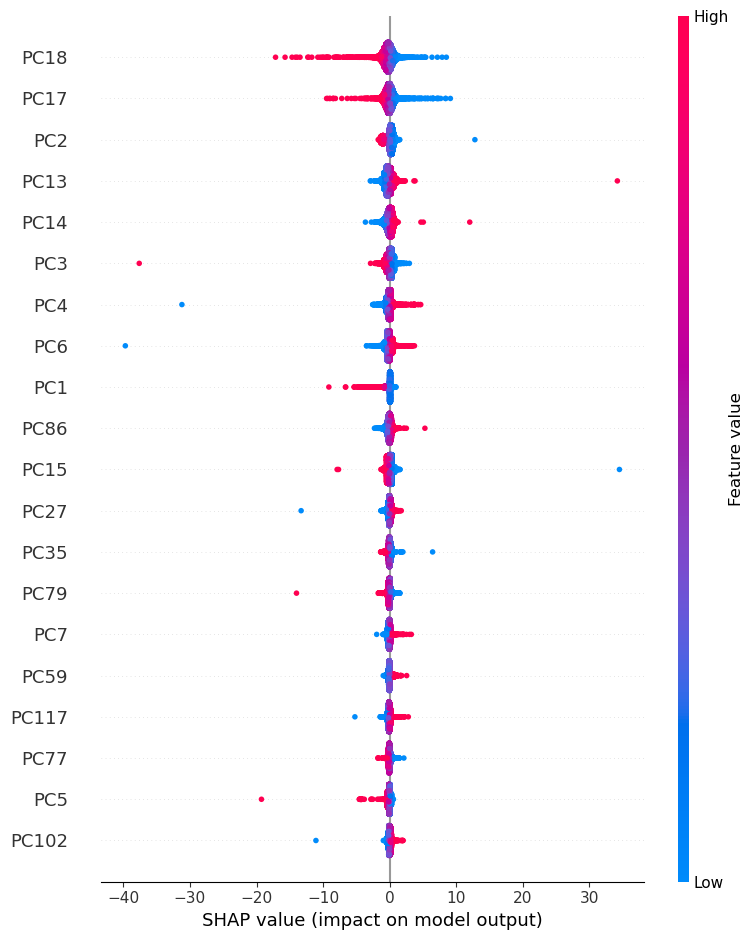

In [5]:
# Generate a SHAP explainer object for the optimized GLM model
explainer = shap.LinearExplainer(glm_optimized, X_train_pca)

shap_values = explainer.shap_values(X_test_pca)
feature_names = [f"PC{i+1}" for i in range(X_test_pca.shape[1])] 
shap.summary_plot(shap_values, X_test_pca, feature_names=feature_names)


The SHAP graph presented reflects the impact of the principal components (PCs) obtained after dimensionality reduction on the model's predictions. By evaluating the SHAP values and analyzing the loadings of the original variables in each component, we can directly connect the PCs with the most relevant features of the dataset, explaining how they influence the model.

PC18 emerges as the most influential component, dominated by variables such as commonarea_mode, commonarea_avg, and commonarea_medi, which capture the importance of shared space in properties. These features reflect design or shared comfort aspects in the properties. Additionally, external factors like ext_source_3, ext_source_1, and ext_source_2 also have a significant loading on this component, suggesting that PC18 encapsulates a combination of internal (property-related) and external (socioeconomic or risk-related) variables. The graph shows that high values in PC18, represented in red, are associated with positive impacts on the model's predictions, indicating that properties with more common space and good external scores are more desirable or less risky according to the model.

On the other hand, PC17 combines variables related to common space (commonarea_) and non-livable areas (nonlivingapartments_), reflecting the physical distribution of the properties. It also includes administrative factors such as flag_document_3, flag_document_8, and name_contract_type_Cash loans. This component seems to capture an interaction between spatial features and the documentary or contractual complexity of the properties. High values in ext_source_2, which also play a significant role in PC17, may be associated with positive external credit scores. In the SHAP graph, the contribution of this component varies more than in PC18, showing a moderate yet relevant impact depending on the balance between non-livable space and administrative factors.

PC4 introduces variables related to the age of the properties, such as years_beginexpluatation_medi, years_build_medi, and structural variables like entrances_* and floorsmin_*. This component reflects the age and physical characteristics of the properties. Older properties or those with less modern structures tend to have lower values in PC4, leading to a negative impact on the model, likely due to structural risks or higher associated costs.

Finally, PC1 primarily captures variables related to the size and layout, such as livingarea_, apartments_, and elevators_*. This component measures key aspects of property infrastructure, representing larger and better-equipped properties. In the SHAP graph, PC1 shows a consistent and positive impact: high values in this component are typically associated with favorable predictions, as they reflect more desirable properties.


In [ ]:
# Components loading
components_df = pd.DataFrame(pca.components_, columns=X_train_selected.columns, index=[f"PC{i+1}" for i in range(pca.components_.shape[0])])

In [ ]:
# Access the loadings of PC18
pc18_loadings = components_df.loc["PC18"]

# Sort the loadings by their absolute value in descending order
pc18_loadings_sorted = pc18_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC18 (loading the top 10 most influential)
top_10_pc18 = pc18_loadings_sorted.head(10)
print("Top 10 most important variables for PC18:")
print(top_10_pc18)

Top 10 most important variables for PC18:
commonarea_mode    0.323442
commonarea_avg     0.323350
commonarea_medi    0.322507
ext_source_3       0.210991
ext_source_1       0.192612
floorsmax_mode     0.175281
ext_source_2       0.175244
floorsmin_avg      0.174013
floorsmin_medi     0.173879
floorsmax_avg      0.173005
Name: PC18, dtype: float64


In [ ]:
# Access the loadings of PC17
pc17_loadings = components_df.loc["PC17"]

# Sort the loadings by their absolute value in descending order
pc17_loadings_sorted = pc17_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC17 (loading the top 10 most influential)
top_10_pc17 = pc17_loadings_sorted.head(10)
print("Top 10 most important variables for PC17:")
print(top_10_pc17)

Top 10 most important variables for PC17:
ext_source_2                     0.268799
commonarea_mode                  0.253864
commonarea_avg                   0.251417
commonarea_medi                  0.250794
nonlivingapartments_mode         0.237494
nonlivingapartments_medi         0.233376
flag_document_3                  0.227345
name_contract_type_Cash loans    0.215355
hour_appr_process_start          0.169986
flag_document_8                  0.169381
Name: PC17, dtype: float64


In [ ]:
# Access the loadings of PC4
pc4_loadings = components_df.loc["PC4"]

# Sort the loadings by their absolute value in descending order
pc4_loadings_sorted = pc4_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC4 (loading the top 10 most influential)
top_10_pc4 = pc4_loadings_sorted.head(10)
print("Top 10 most important variables for PC4:")
print(top_10_pc4)

Top 10 most important variables for PC4:
years_beginexpluatation_medi    0.262614
years_beginexpluatation_avg     0.259617
years_beginexpluatation_mode    0.254536
years_build_medi                0.242756
years_build_avg                 0.242696
years_build_mode                0.239955
entrances_mode                  0.224961
entrances_medi                  0.221802
floorsmin_avg                   0.209605
floorsmin_medi                  0.209467
Name: PC4, dtype: float64


In [ ]:
# Access the loadings of PC1
pc1_loadings = components_df.loc["PC1"]

# Sort the loadings by their absolute value in descending order
pc1_loadings_sorted = pc1_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC1 (loading the top 10 most influential)
top_10_pc1 = pc1_loadings_sorted.head(10)
print("Top 10 most important variables for PC1:")
print(top_10_pc1)


Top 10 most important variables for PC1:
livingarea_avg           0.229719
livingarea_medi          0.229688
livingarea_mode          0.227814
apartments_avg           0.226455
totalarea_mode           0.226378
apartments_medi          0.225315
elevators_medi           0.215861
elevators_mode           0.214649
livingapartments_medi    0.205556
livingapartments_avg     0.204190
Name: PC1, dtype: float64


#### **Waterfall Plot**


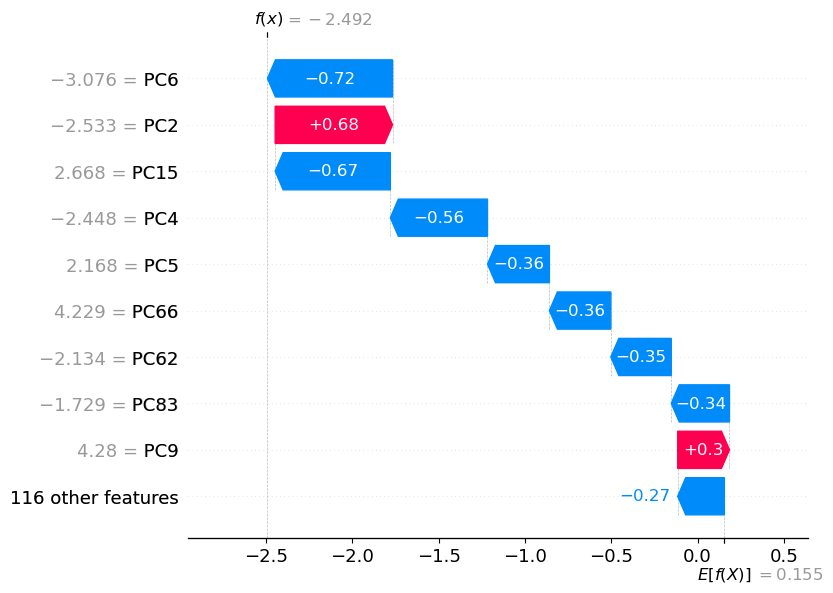

In [ ]:
shap_values_instance = shap_values[0] 

shap_waterfall = shap.Explanation(values=shap_values_instance, 
                                  base_values=explainer.expected_value, 
                                  data=X_test_pca[0], 
                                  feature_names=feature_names)

shap.waterfall_plot(shap_waterfall)


The presented SHAP chart illustrates how the principal components (PCs) contribute to a specific model prediction. Each PC encapsulates a set of original variables, with their importance reflected in the loadings. Below, we link the most relevant components with their dominant variables and explain how these contribute positively or negatively to the outcome.

PC6, which has a strong loading from variables such as amt_goods_price, amt_credit, amt_annuity, and years_beginexpluatation_medi, is primarily associated with the price of goods, the amount of credit requested, and the structural age of the property. This component reflects the financial balance and condition of the property. In this case, its negative impact on the chart indicates that higher values, such as higher prices or older properties, are associated with a higher perceived risk by the model.

PC2 is mainly defined by variables such as organization_type_XNA, flag_emp_phone, days_employed, and name_income_type. These variables capture aspects related to the applicant's job stability and employer organization. The positive impact observed in the chart reflects that higher values in this component, such as greater job stability (days_employed) or certain types of income (name_income_type), contribute favorably to the prediction, indicating lower risk. However, variables like flag_emp_phone, which could indicate administrative inconsistencies, attenuate its positive effect.

PC9 stands out due to the influence of variables like def_60_cnt_social_circle, def_30_cnt_social_circle, and obs_60_cnt_social_circle, which represent the social networks and community interactions of the applicant. This component reflects social integration and the stability of individuals within their communities. In the chart, its positive impact indicates that higher values, associated with greater social cohesion, benefit the model's outcome by reducing the perceived risk.

Finally, PC66 consists of variables like organization_type_Services, organization_type_Industry, and housetype_mode_terraced house. This component captures features related to the applicant's work sector and type of housing. In this case, its negative impact on the chart indicates that certain labor sectors and types of housing are associated with higher risk.

In [ ]:
# Access the loadings of PC6
pc6_loadings = components_df.loc["PC6"]

# Sort the loadings by their absolute value in descending order
pc6_loadings_sorted = pc6_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC6 (loading the top 10 most influential)
top_10_pc6 = pc6_loadings_sorted.head(10)
print("Top 10 most important variables for PC6:")
print(top_10_pc6)


Top 10 most important variables for PC6:
amt_goods_price                 0.275514
amt_credit                      0.274773
amt_annuity                     0.254896
years_beginexpluatation_medi    0.224776
years_beginexpluatation_avg     0.222442
years_beginexpluatation_mode    0.221678
entrances_mode                  0.190601
years_build_medi                0.190184
years_build_avg                 0.189906
entrances_medi                  0.187722
Name: PC6, dtype: float64


In [ ]:
# Access the loadings of PC2
pc2_loadings = components_df.loc["PC2"]

# Sort the loadings by their absolute value in descending order
pc2_loadings_sorted = pc2_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC2 (loading the top 10 most influential)
top_10_pc2 = pc2_loadings_sorted.head(10)
print("Top 10 most important variables for PC2:")
print(top_10_pc2)


Top 10 most important variables for PC2:
organization_type_XNA      0.358780
flag_emp_phone             0.358749
days_employed              0.357708
name_income_type           0.299940
days_birth                 0.296861
flag_document_6            0.247295
reg_city_not_work_city     0.203490
occupation_type            0.195462
live_city_not_work_city    0.164202
ext_source_1               0.139689
Name: PC2, dtype: float64


In [ ]:
# Access the loadings of PC9
pc9_loadings = components_df.loc["PC9"]

# Sort the loadings by their absolute value in descending order
pc9_loadings_sorted = pc9_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC9 (loading the top 10 most influential)
top_10_pc9 = pc9_loadings_sorted.head(10)
print("Top 10 most important variables for PC9:")
print(top_10_pc9)


Top 10 most important variables for PC9:
def_60_cnt_social_circle       0.629870
def_30_cnt_social_circle       0.624164
obs_60_cnt_social_circle       0.293384
nonlivingapartments_mode       0.122597
nonlivingapartments_medi       0.120012
reg_region_not_work_region     0.108848
live_region_not_work_region    0.084522
reg_region_not_live_region     0.082037
region_population_relative     0.071080
nonlivingarea_mode             0.070733
Name: PC9, dtype: float64


In [ ]:
# Access the loadings of PC66
pc66_loadings = components_df.loc["PC66"]

# Sort the loadings by their absolute value in descending order
pc66_loadings_sorted = pc66_loadings.abs().sort_values(ascending=False)

# Show the top 10 most important variables for PC66 (loading the top 10 most influential)
top_10_pc66 = pc66_loadings_sorted.head(10)
print("Top 10 most important variables for PC66:")
print(top_10_pc66)


Top 10 most important variables for PC66:
organization_type_Services               0.458967
organization_type_Industry: type 9       0.422327
organization_type_Insurance              0.286311
organization_type_Industry: type 11      0.268931
organization_type_Hotel                  0.246060
housetype_mode_terraced house            0.224308
name_education_type_Incomplete higher    0.175224
flag_document_8                          0.166461
ext_source_3                             0.152263
flag_document_19                         0.149567
Name: PC66, dtype: float64


#### **Force Plot**

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0], X_test_pca[0], feature_names=feature_names)


This SHAP plot illustrates how the principal components (PCs) influence the final prediction, from the base value to f(x) = -2.49. Each PC has a cumulative positive or negative effect, determined by the variables that dominate them.

PC17, with a significant negative impact, reflects administrative factors and less functional features, such as nonlivingapartments_* and ext_source_2. This reduces the perceived risk. On the other hand, PC9, with a notable positive impact, is associated with social networks and community cohesion (def_60_cnt_social_circle), which reduces the risk.

PC2 reflects labor inconsistencies (organization_type_XNA, flag_emp_phone) and has a considerable negative impact, increasing the risk. Similarly, PC6 and PC4, dominated by financial (amt_goods_price) and structural (years_beginexpluatation_*) variables, contribute negatively due to high prices and older properties.

Other components like PC15, PC66, and PC62 have smaller impacts but still reflect relevant administrative and educational aspects.

In this notebook, SHAP was used to interpret the optimized GLM model, providing valuable insights into how the model's key features influence its predictions. Since PCA was applied for dimensionality reduction, the focus of the analysis was on understanding the contributions of the principal components and their most influential variables.

The analysis highlighted the most relevant features impacting the model's predictions, with a particular emphasis on variables related to financial, structural, and administrative aspects. SHAP allowed us to visualize how each variable contributes positively or negatively to the perceived risk by the model, providing a clear understanding of both the global and local behavior of the model.

This approach enhances the interpretability of the GLM model, emphasizing the variables that have the greatest impact on performance. It also ensures a transparent evaluation of the model's decisions, which is especially useful for validating its application in real-world scenarios and increasing its reliability.

## **Final Conclusion**

In this project, a complex binary classification problem was addressed, characterized by a high class imbalance, high dimensionality, and noisy data. Throughout the analysis, various techniques for feature selection, data balancing, modeling, and evaluation were implemented to optimize the model's performance and ensure its robustness. Below is a summary of the key aspects of the work:

**Feature Selection**
Different selection strategies were evaluated, starting with traditional approaches such as Variance Threshold, which were not useful due to the homogeneity of the features, as all exceeded the minimum variance threshold. Advanced methods like RFE, Lasso, Ridge, and decision trees were then explored, but they showed limitations when applied in isolation. For example:

- Lasso selected less than 10% of the features, but these did not generate a robust predictive model.
- Random Forest and decision trees also failed to significantly improve the metrics.

Ultimately, a hybrid approach combining the aforementioned selection methods was adopted. This approach effectively reduced the number of variables, retaining the most relevant ones for both classes. This step was crucial for improving the model's interpretability and reducing its complexity.

**Data Balancing**
Given the extremely imbalanced nature of the dataset, balancing techniques such as SMOTE were applied, both before and after feature selection. The best results were achieved when balancing was performed before feature selection, as this allowed for the capture of relevant variables for the minority class, avoiding bias towards the majority class.

An integrated pipeline was used that applied SMOTE along with stratified cross-validation, ensuring consistency in balancing across all stages of the process. Although these techniques improved performance, the data imbalance remained a critical challenge, reflected in lower metrics for the minority class.

**Modeling**
Multiple algorithms were tested, including:

- Logistic Regression as the baseline model.
- Random Forest, XGBoost, LightGBM, CatBoost, and GLM as advanced alternatives.

The optimized GLM was selected as the final model, as it offered the best balance between interpretability and performance. Although global metrics such as accuracy and ROC AUC were satisfactory, the model struggled to predict the minority class, with moderate recall and F1-score metrics.

**Interpretability**
Interpretability techniques such as SHAP were used to analyze the contributions of the selected features. While the use of PCA complicated direct interpretation, analyzing the principal components allowed for the identification of the most relevant original variables for the model's predictions. This provided transparency to the process and valuable insights into the most influential factors.

**Overall Conclusion**
The project successfully implemented a complete workflow to address a binary classification problem in a challenging environment. While the results reflect the limitations imposed by the extreme class imbalance, the combined strategies of feature selection, data balancing, and modeling ensured a robust, interpretable model tailored to the problem's characteristics. The insights gained highlight the importance of combining traditional and advanced methods to optimize both performance and interpretability in complex problems.